## MNIS 손글씨 데이터를 활용한 CNN 알고리즘과 Tensorflow 사용법 이해하기

In [1]:
import tensorflow as tf

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import  backend as K
from tensorflow.keras.utils import to_categorical

from tensorflow.keras import losses
from tensorflow.keras import optimizers

import matplotlib.pyplot as plt
import numpy as np

import os

# 버전 충돌로 인한 라이브러리 중복 허용
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_test.shape

(10000, 28, 28)

In [4]:
img_rows, imag_cols = 28, 28

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, imag_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, imag_cols)
    input_shape = (1, img_rows, imag_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, imag_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, imag_cols, 1)
    input_shape = (img_rows, imag_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

print('x_train shape: ', x_train.shape)
print('x_test shape: ', x_test.shape)

x_train shape:  (60000, 28, 28, 1)
x_test shape:  (10000, 28, 28, 1)


In [5]:
num_classes = 10

print('y_train: ', y_train[0:3])

y_c_train = to_categorical(y_train, num_classes)
y_c_test = to_categorical(y_test, num_classes)

print('y_c_train: ', y_c_train[0:3])

y_train:  [5 0 4]
y_c_train:  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


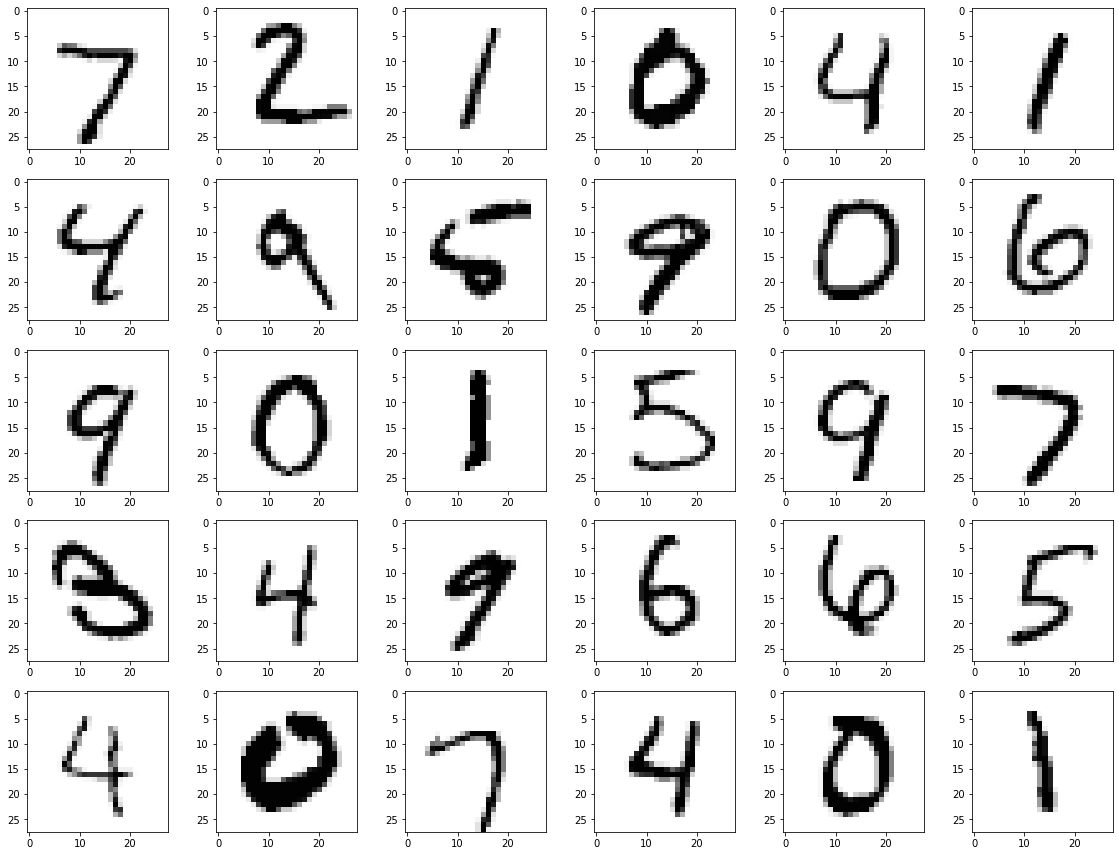

In [6]:
count = 0
plt.figure(figsize=(16,12))

for n in range(30):
    count += 1
    plt.subplot(5, 6,count)
    plt.imshow(x_test[n].reshape(28, 28), cmap=('Greys'), interpolation='nearest')

plt.tight_layout()
plt.show()

In [7]:

model = Sequential()
model.add(Conv2D(10, kernel_size=(5,5), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(20, (5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), metrics=['accuracy'])

## CNN 알고리즘 
![최소제곱법](img\model.png)

## CNN 네트워크 구성
![CNN 네트워크](img\network_process.png)

In [8]:
model.fit(x_train, y_c_train, batch_size=512, epochs=10, verbose=1, validation_data=(x_test, y_c_test))

Epoch 1/10
118/118 [==============================] - 7s 51ms/step - loss: 0.8943 - accuracy: 0.7262 - val_loss: 0.2272 - val_accuracy: 0.9361
Epoch 2/10
118/118 [==============================] - 10s 81ms/step - loss: 0.2364 - accuracy: 0.9296 - val_loss: 0.1263 - val_accuracy: 0.9626
Epoch 3/10
118/118 [==============================] - 8s 71ms/step - loss: 0.1549 - accuracy: 0.9521 - val_loss: 0.0903 - val_accuracy: 0.9735
Epoch 4/10
118/118 [==============================] - 6s 53ms/step - loss: 0.1217 - accuracy: 0.9631 - val_loss: 0.0731 - val_accuracy: 0.9781
Epoch 5/10
118/118 [==============================] - 6s 52ms/step - loss: 0.1028 - accuracy: 0.9688 - val_loss: 0.0630 - val_accuracy: 0.9795
Epoch 6/10
118/118 [==============================] - 6s 51ms/step - loss: 0.0918 - accuracy: 0.9713 - val_loss: 0.0573 - val_accuracy: 0.9828
Epoch 7/10
118/118 [==============================] - 6s 52ms/step - loss: 0.0826 - accuracy: 0.9746 - val_loss: 0.0504 - val_accuracy: 0.984

In [ ]:
score = model.evaluate(x_test, y_c_test, verbose=0)
print('test loss: ', score[0])
print('test accuracy: ', score[1])

In [9]:
def show_predict(model, x_data, y_data):
    plt.imshow(x_data.reshape(28,28), cmap='Greys')
    plt.show()

    predict = model.predict(x_data.reshape(1, 28, 28, 1))
    print(predict)
    print('정답: ', y_data)
    print('예측: ', np.argmax(predict))

In [ ]:
n = 0
show_predict(model, x_test[n], y_test[n])

In [ ]:
n = 1000
show_predict(model, x_test[n], y_test[n])

In [ ]:
n = 8
show_predict(model, x_test[n], y_test[n])

In [ ]:
for i in range(len(x_test)):
    predict = model.predict(x_test[i].reshape(1, 28, 28, 1))
    if y_test[i] != np.argmax(predict):
        print('index: ', i)

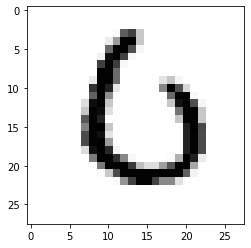

[[2.6051813e-01 2.2864779e-09 5.3719173e-08 4.3038229e-11 2.5253107e-06
  7.8686871e-06 7.3947090e-01 1.2447119e-09 3.3560690e-07 1.8942413e-07]]
정답:  0
예측:  6


In [10]:
n = 1621
show_predict(model, x_test[n], y_test[n])

In [ ]:
n = 9770
show_predict(model, x_test[n], y_test[n])